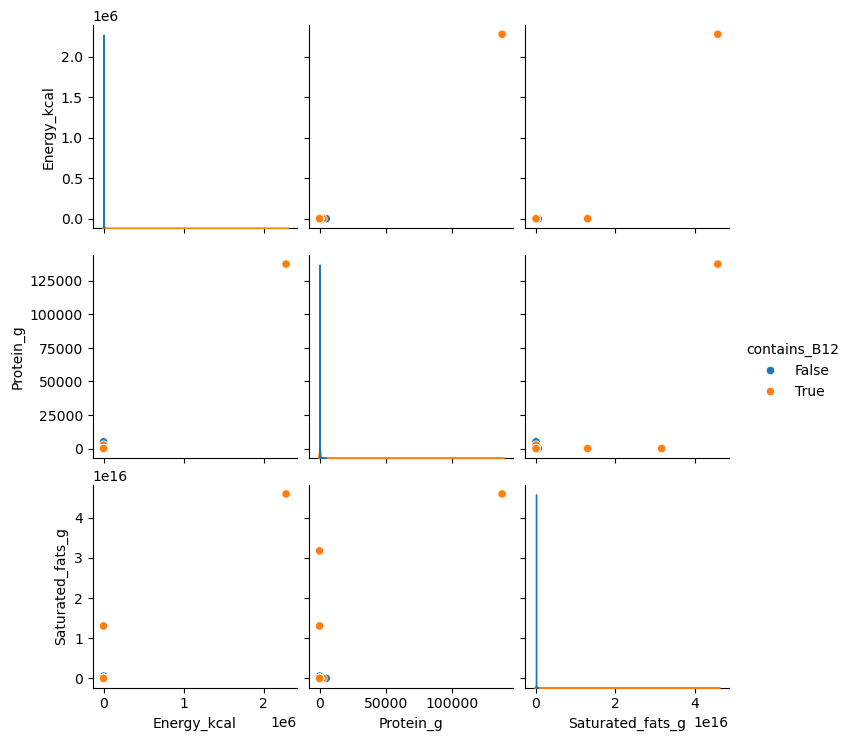

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.read_csv("ingredients.csv")
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data["Energy_kcal"] = train_data["Energy_kcal"].round()
train_data["contains_B12"] = train_data["VitB12_mcg"] != 0.0
sns.pairplot(train_data, vars=["Energy_kcal", "Protein_g", "Saturated_fats_g"], hue="contains_B12")
